In [68]:
import numpy as np
import csv
from scipy.optimize import minimize    
from sklearn.preprocessing import StandardScaler

In [69]:
def cost0(z):
    '''
    input:
        z -> array-like list with shape of m x 1
    output:
        cost -> array-like list with shape of m x 1
    '''
    for i in range(z.shape[0]):
        if z[i, 0] > -1:
            pass
        else:
            z[i, 0] = 0
    return z

def cost1(z):
    '''
    input:
        z -> array-like list with shape of m x 1
    output:
        cost -> array-like list with shape of m x 1
    '''
    for i in range(z.shape[0]):
        if z[i, 0] < 1:
            pass
        else:
            z[i, 0] = 0
    return z


In [70]:
def loss_function(theta, x, y):
    '''
    input:
        x -> m x n matrix
        y -> m x 1 matrix
        theta -> parameters with size of n x 1
    output:
        loss -> real number
    '''
    theta = theta.reshape((2, 1))
    C = 10
    t = C * np.dot(y.T, cost1(np.dot(x, theta))) + np.dot((1 - y).T, cost0(np.dot(x, theta))) + 0.5 * np.sum(np.square(theta.reshape(2, 1)), keepdims=True) 
    # m x 1 @ m * 1 = m x m
    
    #     loss = C * t
 #   print(t.shape)
    return t.item()

In [71]:
def gradient_descent(x, y, theta, alpha):
    '''
    TODO -> complete this function
    '''
    partial = 0.5 * np.sum(x)
    theta = theta - alpha * partial

In [72]:
def load_data(filepath):
    '''
    input:
        filepath -> location where your csv file is stored
    output:
        data -> csv data loaded (type -> 2d numpy array)
    '''
    data = []
    with open(filepath, newline='') as csvfile:
        csvfile = csv.reader(csvfile)
        for row in csvfile:
            data.append(row)
    return np.array(data)

In [73]:
def get_x_y(data):
    x = data[:, 0:2]
    x = np.asarray(x, dtype=np.float64, order='C')
#     x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
    y = data[:, -1].reshape(-1, 1)
    
    string_to_int = {'Iris-setosa': 1, 'Iris-versicolor':0}
    helper = lambda string : string_to_int[string]
    for i in range(y.shape[0]):
        y[i, 0] = helper(y[i,0])
    y = np.asarray(y, dtype=np.float64, order='C')
    scaler = StandardScaler()
    print(scaler.fit(x))
    xx = scaler.transform(x)
    return xx, y

In [74]:
filepath = '../Chap5_SupportVectorMachine/iris.csv'
data = load_data(filepath)
x, y = get_x_y(data)
theta = np.array([0, 0])

StandardScaler()


In [75]:
res = minimize(fun=loss_function,
                       x0=theta,
                       args=(x, y),
                       method='TNC')
theta_opt = res.x.copy()
theta_opt

array([ 312.52006969, -324.57113055])

In [76]:
import matplotlib.pyplot as plt

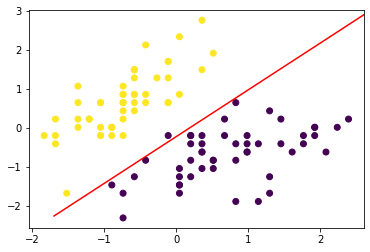

In [80]:
xx1 = [x[i][0] for i in range(len(x))]
xx2 = [x[i][1] for i in range(len(x))]
yy = y
import matplotlib.lines as mlines
line = mlines.Line2D([0,1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
fig, ax = plt.subplots()
ax.scatter(xx1, xx2, c =yy)
ax.add_line(line)
plt.show()

In [82]:
a = np.array([1, 2])
def func(a, theta):
    return np.dot(a, theta)
t = np.array([300, -300])
func(x, t)

array([-431.4603997 , -208.75767112, -429.40085394, -413.05218495,
       -541.78199111, -543.84153687, -603.05757555, -415.11173071,
       -380.35484697, -272.09280132, -417.17127647, -509.08465313,
       -255.74413233, -490.67643837, -419.23082223, -719.55780424,
       -543.84153687, -431.4603997 , -339.54702304, -621.4657903 ,
       -227.16588587, -558.1306601 , -729.72783595, -304.7901393 ,
       -509.08465313, -161.77120991, -415.11173071, -384.47393849,
       -321.13880829, -429.40085394, -319.07926253, -227.16588587,
       -764.48471969, -686.86046626, -272.09280132, -288.44147031,
       -243.51455486, -272.09280132, -443.68997717, -368.1252695 ,
       -478.44686091,   46.64239544, -570.36023756, -478.44686091,
       -621.4657903 , -255.74413233, -621.4657903 , -476.38731515,
       -464.15773768, -351.77660051,  651.28775388,  369.36898662,
        667.63642287,  516.50700754,  669.69596863,  293.80427896,
        259.04739521,  171.25311008,  653.34729964,  122.20710

In [83]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear')
clf.fit(x, y)

D:\LANGUAGE\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [86]:
clf.intercept_
clf.coef_

array([[-1.93014264,  1.60829995]])